# Árvore de decisão

### Base de dados: Forma de Trabalho Ideal

Ilustra o funcionamento do algoritmo de árvore de decisão com dados nominais.

Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).

Prof. Hugo de Paula e Hayala

Feito Por: João Vitor de Lima

-------------------------------------------------------------------------------






In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Transformação de dados

Inicialmente os atributos são convertidos para o formato de dicionário.
Em seguida os atributos são transformados em binário, para cada par (key, value) do dicionário.

<code>DictVectorizer(dtype=class ‘numpy.float64’, separator=’=’, sparse=True, sort=True)</code>

A classe é convertida para labels únicos sequenciais.

<code>
 le = preprocessing.LabelEncoder()
  
 le.fit(dados)
</code>


In [36]:
df = pd.read_csv("dataset_tratado.csv")

print("\nDimensões:", df.shape)
print("\nCampos:", df.columns)
print(df.describe())


Dimensões: (3713, 24)

Campos: Index(['Idade', 'Gênero', 'Cor/Raça', 'Horas com trabalho doméstico e cuidado',
       'PCD', 'Estado onde mora', 'Região onde mora', 'Roubos de veículo',
       'Roubos de carro', 'Roubos de moto', 'Roubos de bicicleta',
       'Roubos fora do domicílio', 'Total de roubos', 'Nivel de segurança',
       'Nível de ensino', 'Área de formação', 'Situação atual de trabalho',
       'Cargo atual', 'Nível', 'Faixa salarial', 'Tempo de experiência',
       'Forma de trabalho atual',
       'Decisão da empresa para modelo 100% presencial',
       'Forma de trabalho ideal'],
      dtype='object')
             Idade  Horas com trabalho doméstico e cuidado  Roubos de veículo  \
count  3713.000000                             3713.000000        3713.000000   
mean     30.887692                               16.787988          68.710477   
std       6.843938                                0.394420          34.970815   
min      18.000000                               

In [37]:
# Separar variáveis independentes e alvo
X_dict = df.drop(columns=['Roubos de veículo',	'Roubos de carro',	'Roubos de moto', 'Roubos de bicicleta',	'Roubos fora do domicílio',	'Total de roubos', 'Forma de trabalho ideal']).to_dict(orient='records')
vect = DictVectorizer(sparse=False)
X = vect.fit_transform(X_dict)

le = LabelEncoder()
y = le.fit_transform(df['Forma de trabalho ideal'])

# Dividir os dados corretamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape dos dados de treino:", X_train.shape)
print("Shape dos dados de teste:", X_test.shape)

Shape dos dados de treino: (2599, 117)
Shape dos dados de teste: (1114, 117)


### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



Acurácia no treino: 0.7933820700269334
Acurácia no teste: 0.7459605026929982
              precision    recall  f1-score   support

           0       0.14      0.05      0.08        19
           1       0.74      0.77      0.75       524
           2       0.76      0.75      0.76       571

    accuracy                           0.75      1114
   macro avg       0.55      0.52      0.53      1114
weighted avg       0.74      0.75      0.74      1114

                             Prev=Modelo 100% presencial  \
Real=Modelo 100% presencial                            1   
Real=Modelo 100% remoto                                4   
Real=Modelo híbrido                                    2   

                             Prev=Modelo 100% remoto  Prev=Modelo híbrido  
Real=Modelo 100% presencial                        3                   15  
Real=Modelo 100% remoto                          401                  119  
Real=Modelo híbrido                              140                  429

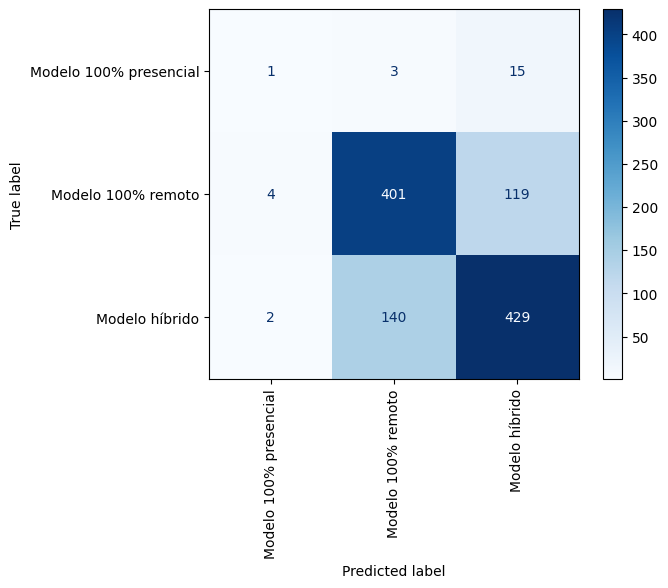

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

# Definir modelo com limitação de profundidade e folhas mínimas
treeForma = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=7)
treeForma.fit(X_train, y_train)
print("Acurácia no treino:", treeForma.score(X_train, y_train))

# Avaliação no conjunto de teste
y_pred = treeForma.predict(X_test)
print("Acurácia no teste:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(cnf_matrix, index=[f"Real={c}" for c in le.classes_], columns=[f"Prev={c}" for c in le.classes_])
print(cnf_table)

display = ConfusionMatrixDisplay.from_estimator(treeForma, X_test, y_test, display_labels=le.classes_, cmap=plt.cm.Blues)

plt.xticks(rotation=90)
plt.show()


### Exibição da árvore de decisão




Importância dos atributos:
Decisão da empresa para modelo 100% presencial=Vou procurar outra oportunidade no modelo 100% remoto    0.542008
Forma de trabalho atual=Modelo 100% remoto                                                              0.138466
Idade                                                                                                   0.044985
Tempo de experiência=de 7 a 10 anos                                                                     0.015375
Estado onde mora=Rio Grande do Sul (RS)                                                                 0.014193
Nível=Pleno                                                                                             0.011914
Situação atual de trabalho=Empregado (CLT)                                                              0.011717
Decisão da empresa para modelo 100% presencial=Vou aceitar e retornar ao modelo 100% presencial         0.010651
Estado onde mora=Distrito Federal (DF)                              

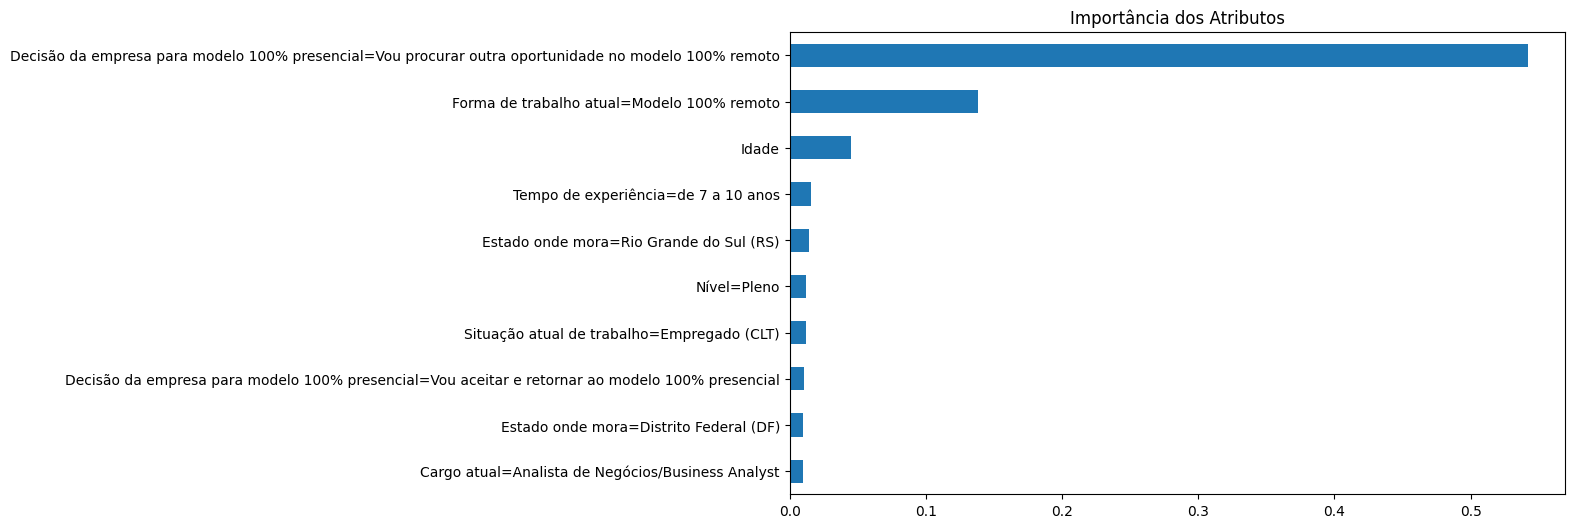

In [40]:
# Exibir importâncias dos atributos
importances = pd.Series(treeForma.feature_importances_, index=vect.feature_names_)
importances = importances[importances > 0].sort_values(ascending=False).head(10)
print("\nImportância dos atributos:")
print(importances)

# Visualizar graficamente
importances.plot(kind='barh', figsize=(10, 6), title='Importância dos Atributos')
plt.gca().invert_yaxis()
plt.show()


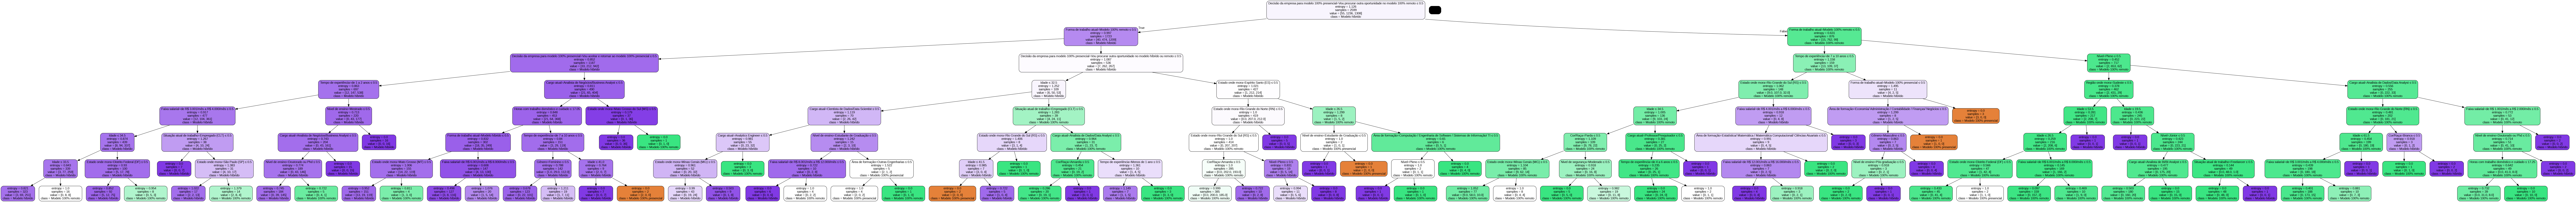

In [35]:
import pydotplus
from sklearn import tree
from IPython.display import Image

dot_data = tree.export_graphviz(treeForma, out_file=None, feature_names=vect.get_feature_names_out(), class_names=le.classes_, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())